In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('data/corpus_el_labelled.csv', sep=';')
df.sample(10)

,el,author
1218,Κατά τη σημερινή του συνεδρίαση το Διοικητικό ...,translator
340,EMBARGOΑπαγόρευση δημοσίευσης πριν από τις 11....,translator
226,"Ο Πρόεδρος της Ελληνικής Δημοκρατίας, κ. Προκό...",translator
376,"Κατά τη σημερινή του συνεδρίαση, το Διοικητικό...",translator
134,17 Σεπτεμβρίου 2018 Τα νέα τραπεζογραμμάτια τ...,translator
111,28 Μαΐου 2019 Κυκλοφορούν σήμερα τραπεζογραμμά...,google
330,EMBARGOΑπαγόρευση δημοσίευσης πριν από τις 10....,translator
881,Σε συνέχεια των αποφάσεων που ελήφθησαν στις 2...,google
957,"Σήμερα, η Ευρωπαϊκή Κεντρική Τράπεζα και η Ευρ...",google
562,Κατά τη σημερινή του συνεδρίαση το Διοικητικό ...,translator


In [6]:
df.replace({'author': {'google': 1, 'translator': 0}}, inplace=True)
df.sample(10)

,el,author
646,"Σήμερα η Σλοβακία εισήγαγε το ευρώ. Έτσι, ο αρ...",0
86,Η επανεξέταση θα περιλαμβάνει την ποσοτική δια...,0
383,"Στη σημερινή του συνεδρίαση, το Διοικητικό Συμ...",1
410,Η Ευρωπαϊκή Κεντρική Τράπεζα (ΕΚΤ) ανακοινώνει...,0
57,Στη σημερινή συνεδρίαση το Διοικητικό Συμβούλι...,1
187,Στη σημερινή συνεδρίαση το Διοικητικό Συμβούλι...,1
1046,Στο πλαίσιο του διεθνούς αρχιτεκτονικού διαγων...,0
917,Στη σημερινή συνεδρίαση το Διοικητικό Συμβούλι...,1
277,Στη σημερινή συνεδρίασή του το Διοικητικό Συμβ...,1
492,Το Διοικητικό Συμβούλιο της Ευρωπαϊκής Κεντρικ...,0


In [19]:
df.isna().sum()

el        0
author    0
dtype: int64

In [8]:
X = df['el']
y = df['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1032,), (258,), (1032,), (258,))

In [11]:
vect = TfidfVectorizer(max_features=10000)

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

clf = SVC()

pipe = make_pipeline(vect, clf)

param_grid = {
    'svc__C': [0.01, 0.1, 0.5, 1, 10],
    'tfidfvectorizer__ngram_range': [(1, 2), (2, 2), (2, 3)]
}

gs = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
gs.fit(X_train, y_train)

print('-'*48)
print('Best params:', gs.best_params_)
print('Best f1-score:', round(gs.best_score_, 4))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
------------------------------------------------
Best params: {'svc__C': 10, 'tfidfvectorizer__ngram_range': (2, 3)}
Best f1-score: 0.8951917909696177


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       133
           1       0.88      0.90      0.89       125

    accuracy                           0.90       258
   macro avg       0.90      0.90      0.90       258
weighted avg       0.90      0.90      0.90       258



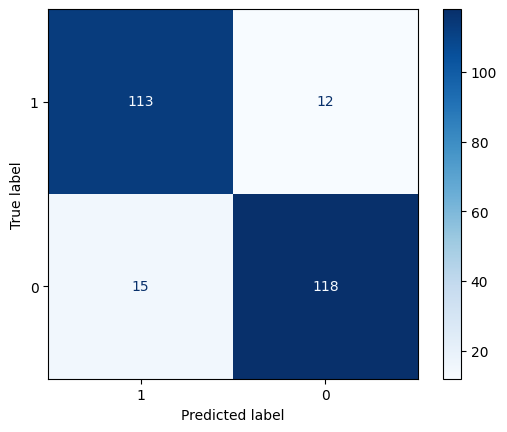

In [26]:
y_pred = gs.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
ConfusionMatrixDisplay(cm, display_labels=[1, 0]).plot(cmap=plt.cm.Blues);

In [44]:
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

0.388 (+/-0.062) for {'svc__C': 0.01, 'tfidfvectorizer__ngram_range': (1, 2)}
0.337 (+/-0.013) for {'svc__C': 0.01, 'tfidfvectorizer__ngram_range': (2, 2)}
0.335 (+/-0.002) for {'svc__C': 0.01, 'tfidfvectorizer__ngram_range': (2, 3)}
0.702 (+/-0.090) for {'svc__C': 0.1, 'tfidfvectorizer__ngram_range': (1, 2)}
0.697 (+/-0.086) for {'svc__C': 0.1, 'tfidfvectorizer__ngram_range': (2, 2)}
0.719 (+/-0.072) for {'svc__C': 0.1, 'tfidfvectorizer__ngram_range': (2, 3)}
0.836 (+/-0.041) for {'svc__C': 0.5, 'tfidfvectorizer__ngram_range': (1, 2)}
0.850 (+/-0.034) for {'svc__C': 0.5, 'tfidfvectorizer__ngram_range': (2, 2)}
0.860 (+/-0.047) for {'svc__C': 0.5, 'tfidfvectorizer__ngram_range': (2, 3)}
0.847 (+/-0.057) for {'svc__C': 1, 'tfidfvectorizer__ngram_range': (1, 2)}
0.856 (+/-0.063) for {'svc__C': 1, 'tfidfvectorizer__ngram_range': (2, 2)}
0.884 (+/-0.089) for {'svc__C': 1, 'tfidfvectorizer__ngram_range': (2, 3)}
0.884 (+/-0.069) for {'svc__C': 10, 'tfidfvectorizer__ngram_range': (1, 2)}
0.8

In [53]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):

    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2), len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2), len(grid_param_1))

    _, ax = plt.subplots(1, 1) # Plot Grid search scores

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title('Grid Search scores')
    ax.set_xlabel(name_param_1)
    ax.set_ylabel('10-fold CV f1 macro avg.')
    ax.legend(loc='best')
    ax.grid('on')

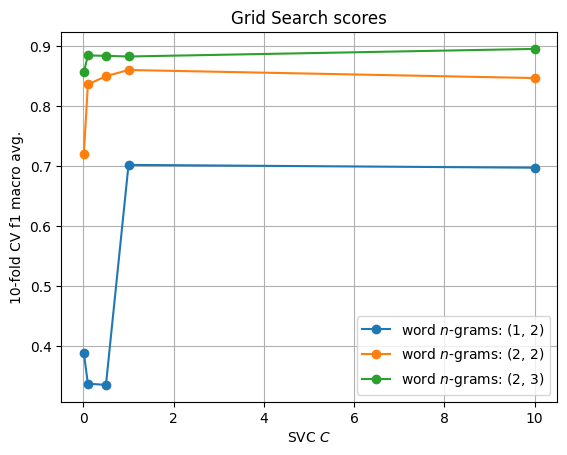

In [54]:
plot_grid_search(gs.cv_results_, param_grid['svc__C'], param_grid['tfidfvectorizer__ngram_range'], r'SVC $C$', r'word $n$-grams')